In [1]:
# Math showcasing how to convert a Classical Neuron to a Finite Gaussian Neuron and back

In [2]:
import numpy as np

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# math and visual proof 

# scale of the heat maps
X1 = np.arange(-8,8.1, 0.1)
X2 = np.arange(-8,8.1, 0.1)
X1s, X2s = np.meshgrid(X1,X2)
inputs_heatmap = np.reshape(list(zip(X1s.flatten(),X2s.flatten())),(-1,2))
print("shape of heatmap", np.shape(inputs_heatmap))
# print(inputs_heatmap)

shape of heatmap (25921, 2)


In [5]:
num_dim = 2

# random classical neuron params
W = np.random.randint(low=-100, high=100, size=2)
print(W)
b = 2000.0*(np.random.rand(1)-0.5)
print(b)

# WX+b = 0 line
zero_line = -(W[0]*X1+b)/W[1]

# orthogonal line
ortho_line = W[1]*X1 / W[0]

# point closest to origin will be new centers
centers = (-b/np.dot(W,W))*W
print(centers)
# # (different way to compute same numbers)
# centers = np.array([w * (-b/np.sum([w*w for w in W])) for w in W])
# print(centers)

# sig equal to input dim
sig = 1*num_dim

# backwards 
bb = -np.dot(W,centers)
print( bb)

[51 98]
[861.2337694]
[-3.59876462 -6.9152732 ]
861.2337694007904


In [6]:
# heatmap of classic activity
l_activity = np.sum(W*inputs_heatmap, axis=1)+b
print(l_activity.shape)

(25921,)


<IPython.core.display.Javascript object>


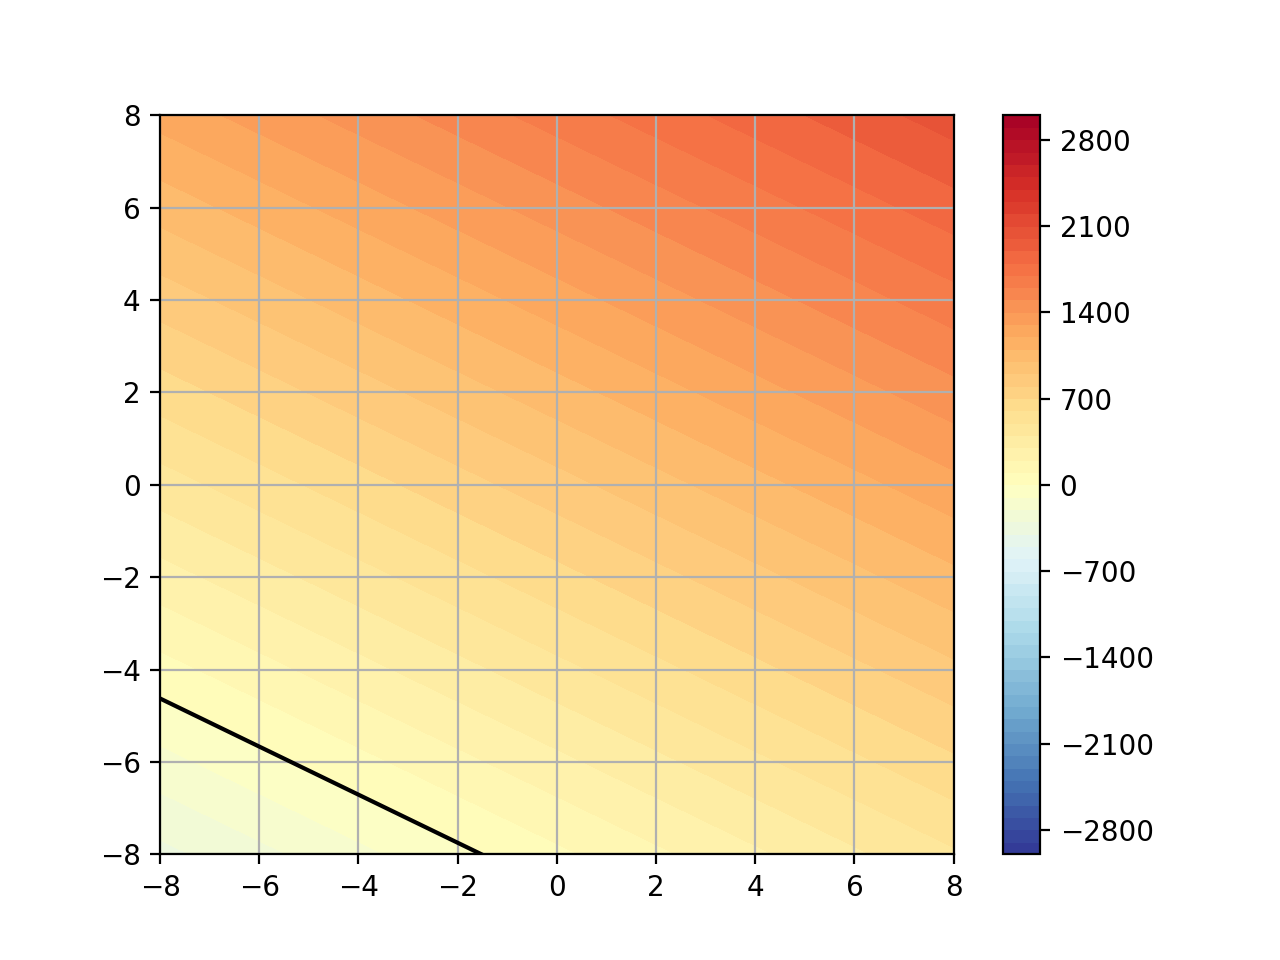

In [7]:
# plot the zero line
plt.plot(X1,zero_line, color='black')

# compute range of activity
max_activity = np.max([np.abs(np.min(l_activity)),np.max(l_activity)])
# round up max activity to nearest log10
base = np.floor(np.log10(max_activity))
rounded_max = (10**base)*(np.ceil(max_activity/10**base))

levels = np.arange(-rounded_max, rounded_max+0.1, 10**(base-1))
# ticks = np.arange(-rounded_max, rounded_max+0.1, 5*10**(base-1))
ticks = levels[::5]


plt.contourf(X1s, X2s, np.reshape(l_activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
# plt.contourf(X1s, X2s, np.reshape(n_activity, np.shape(X1s) ), cmap=cm.RdYlBu_r)

# plt.colorbar(ticks=ticks)
plt.colorbar()
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [8]:
# heatmap radial activity 
r_activity = np.exp((-1.0/sig**2) *  np.sum(np.square(inputs_heatmap-centers), axis=1))

# overall heatmap activity
activity = l_activity*r_activity

<IPython.core.display.Javascript object>


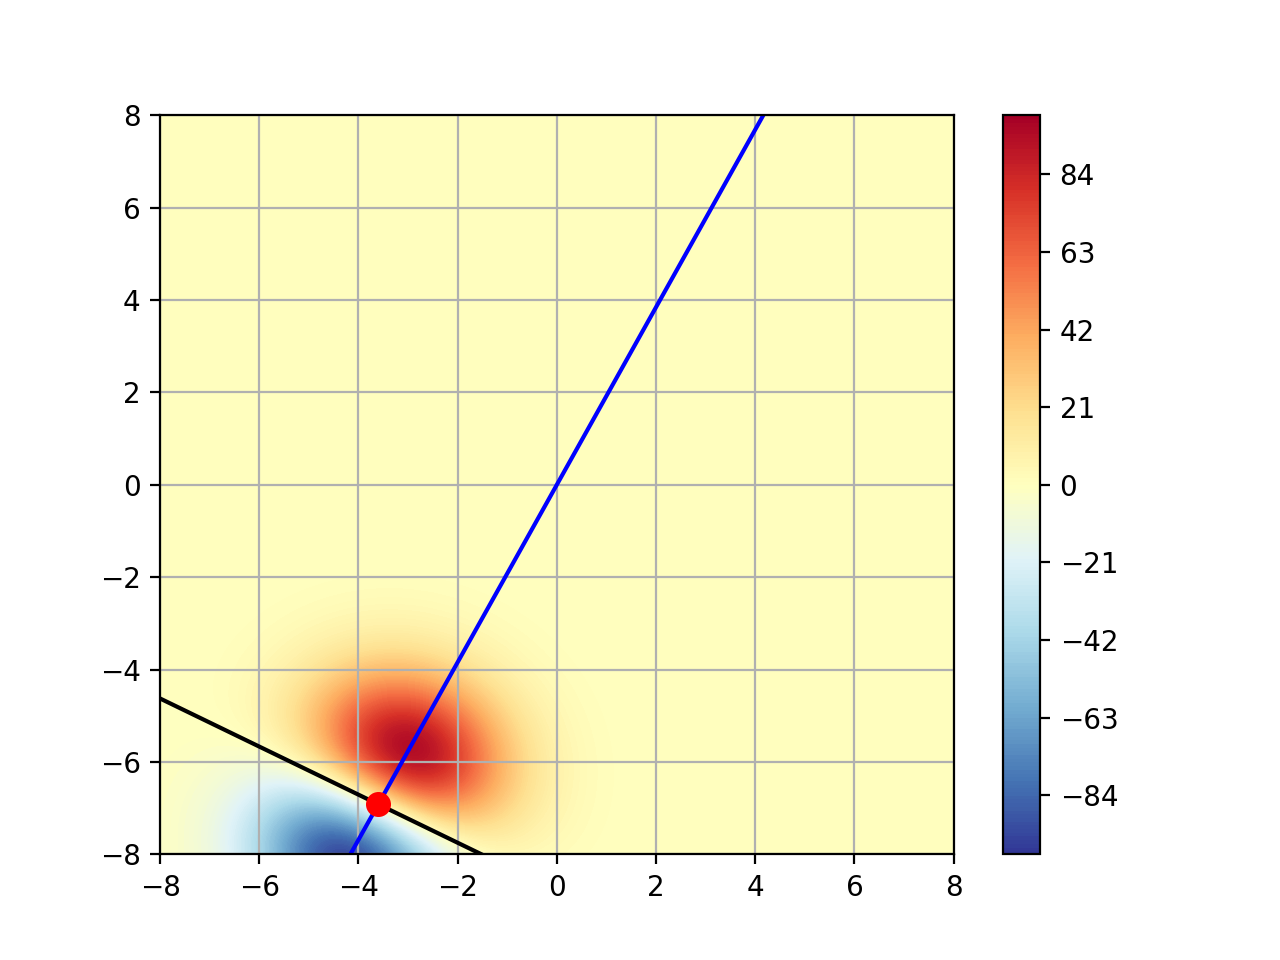

In [9]:
# plot the zero line
plt.plot(X1,zero_line, color='black')
plt.plot(X1,ortho_line, color='blue')
plt.plot(centers[0], centers[1], marker='o', markersize=8, color="red")

# compute range of activity
max_activity = np.max([np.abs(np.min(activity)),np.max(activity)])
# round up max activity to nearest log10
base = np.floor(np.log10(max_activity))
rounded_max = (10**base)*(np.ceil(max_activity/10**base))

levels = np.arange(-rounded_max, rounded_max+0.1, 10**(base-1))
# ticks = np.arange(-rounded_max, rounded_max+0.1, 5*10**(base-1))
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
# plt.contourf(X1s, X2s, np.reshape(activity, np.shape(X1s) ), cmap=cm.RdYlBu_r)

# plt.colorbar(ticks=ticks)
plt.colorbar()
#reset axes
# plt.axis([-3,3, -3, 3])
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()